<a href="https://colab.research.google.com/github/SebastienBienfait/L2C-Data-managment/blob/main/Numpy_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigate, wrangle, add new data to the dataframe, filter and correlate

The following data file contains data about student scores in math, reading and writing.  The exam scores are assumed to be percentages. It also contains data about gender, ethnicity, parental education, whether the student qualifies for free school food and whether or not the student has taken a preparation course for the exams.  The data set has already been cleaned. 

1.  Investigate the data set.

2.  Create numpy arrays to hold each of the three sets of scores.  
Create a new numpy array to hold the average exam score (of the three scores for each student)
Add the new numpy array as a new column in the dataframe.

3.  Filter the original dataset into a new dataframe containing just the females.  Calculate the average exam scores for all rows in this new dataframe and then find the mean of the average column.

4.  Do the same for the males.

5.  Use the original dataset to find the correlation coefficient for reading and maths.  How closely do they correlate?  Write what you find in a text box below the code.

6.  Do the same for reading and writing. What do you find?

7.  You might want to filter on different criteria and check correlation (e.g. those on free school meals, or those who had prepared, etc)







The dataset can be accessed here:  https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv.  This is a .csv file.

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)   

url = "https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/exams.csv"
df = pd.read_csv(url)
#df.info()
df.rename(columns = {"math_score" : "maths_score"}, inplace = True)

print("\n\n")
def test_null():
  for i in df.columns:
    if df[i].isnull().values.any() == True:
      print(i,"has null values")
    else:
      print(i, "has no null values")
test_null()


def into_array(df):
  maths_array = df["maths_score"].to_numpy(np.int16) # memory issue when using int8
  reading_array = df["reading_score"].to_numpy(np.int16)
  writing_array = df["writing_score"].to_numpy(np.int16)

  avg_array =  (maths_array + reading_array + writing_array)/3
  return maths_array, reading_array, writing_array, avg_array

df["average_score"] = into_array(df)[3].tolist()
display(df.columns)
display(df.groupby("gender").mean())
display(df.groupby("lunch").mean())
display(df.groupby("preparation_course").mean())






gender has no null values
ethnicity has no null values
parental_education has no null values
lunch has no null values
preparation_course has no null values
maths_score has no null values
reading_score has no null values
writing_score has no null values


Index(['gender', 'ethnicity', 'parental_education', 'lunch',
       'preparation_course', 'maths_score', 'reading_score', 'writing_score',
       'average_score'],
      dtype='object')

,maths_score,reading_score,writing_score,average_score
gender,,,,
female,64.941532,73.866935,73.651210,70.819892
male,68.748016,65.648810,63.581349,65.992725


,maths_score,reading_score,writing_score,average_score
lunch,,,,
free/reduced,59.181303,64.776204,63.062323,62.339943
standard,71.049459,72.425039,71.584235,71.686244


,maths_score,reading_score,writing_score,average_score
preparation_course,,,,
completed,69.660221,74.292818,74.925414,72.959484
none,65.271160,67.133229,64.973354,65.792581


The mean scores for females: 
 maths_score      64.941532
reading_score    73.866935
writing_score    73.651210
average_score    70.819892
Name: mean, dtype: float64



The mean scores for males: 
 maths_score      68.748016
reading_score    65.648810
writing_score    63.581349
average_score    65.992725
Name: mean, dtype: float64
The corrolations for males and for females:


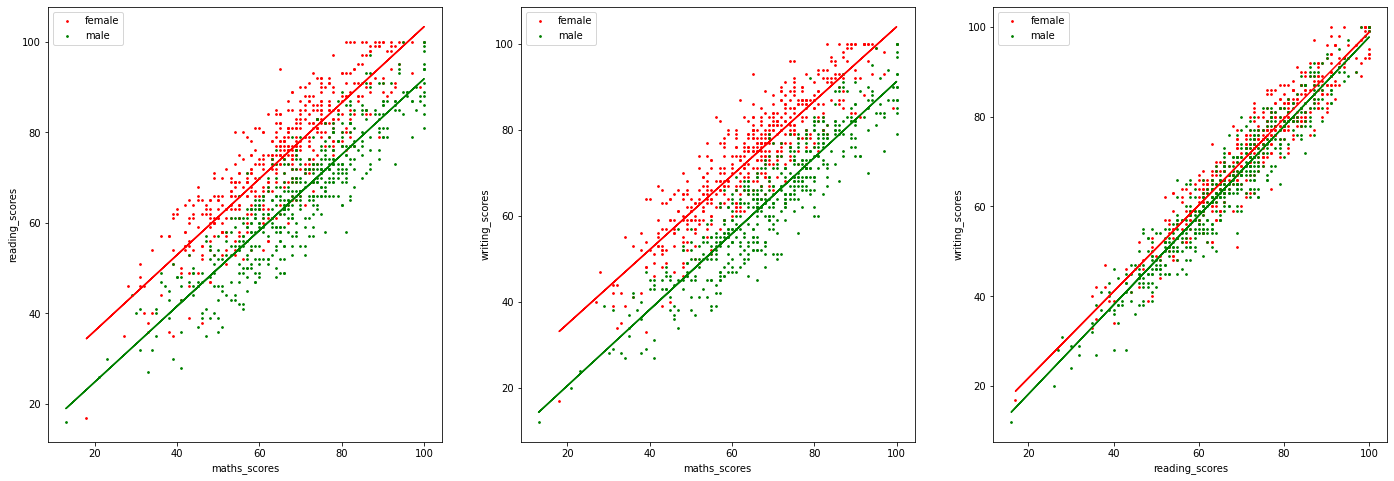

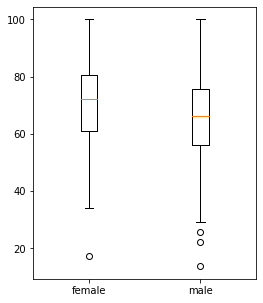

female 

 maths - reading corrolation: 0.8808243823283655 

maths - writing corrolation: 0.8958793586806074 

reading - writing corrolation: 0.9518198592169911


 male 

maths - reading corrolation: 0.9004966720484565 

maths - writing corrolation: 0.9146641116784466 

reading - writing corrolation: 0.9557073320386953


(None, None)

In [111]:
def filter_by_remove(column,todrop):
  new_df = df.drop(df[df[column] == todrop].index) #", inplace = True" - This will update the df before the .method (the one that called it) - dataframe.method( ,inplace = True)
                                                   # This should be removed if you are saving a df to a seperate vairable -- equivalent to: a+=1
                                                   # But should be used when you are just updating an exsisting df
  new_df_mean_vals = new_df.describe().iloc[1]
  return new_df, new_df_mean_vals

def best_fit(arr1,arr2):
  return np.polyfit(arr1,arr2,1)

def corrolate(df1,df2,df1name,df2name,colour1,colour2):
  arr_df1_maths, arr_df1_reading, arr_df1_writing, arr_df1_avg = into_array(df1)
  arr_df2_maths, arr_df2_reading, arr_df2_writing, arr_df2_avg = into_array(df2)

  df1_corr_maths_reading = np.corrcoef(arr_df1_maths,arr_df1_reading)[0][1]
  df1_corr_maths_writing = np.corrcoef(arr_df1_maths,arr_df1_writing)[0][1]
  df1_corr_reading_writing = np.corrcoef(arr_df1_reading,arr_df1_writing)[0][1]

  df2_corr_maths_reading = np.corrcoef(arr_df2_maths,arr_df2_reading)[0][1]
  df2_corr_maths_writing = np.corrcoef(arr_df2_maths,arr_df2_writing)[0][1]
  df2_corr_reading_writing = np.corrcoef(arr_df2_reading,arr_df2_writing)[0][1]


  a01, b01 = np.polyfit(arr_df1_maths,arr_df1_reading,1)
  a02, b02 = np.polyfit(arr_df2_maths,arr_df2_reading,1)

  a11, b11 = np.polyfit(arr_df1_maths,arr_df1_writing,1)
  a12, b12 = np.polyfit(arr_df2_maths,arr_df2_writing,1)

  a21, b21 = np.polyfit(arr_df1_reading,arr_df1_writing,1)
  a22, b22 = np.polyfit(arr_df2_reading,arr_df2_writing,1)

  a31, b31 = np.polyfit(arr_df1_reading,arr_df1_writing,1)
  a32, b32 = np.polyfit(arr_df2_reading,arr_df2_writing,1)

  fig,ax = plt.subplots(1,3,figsize=(24,8))

  ax[0].scatter(arr_df1_maths,arr_df1_reading,label=df1name,color=colour1,s=3)
  ax[0].scatter(arr_df2_maths,arr_df2_reading,label=df2name,color=colour2,s=3)
  ax[0].set_xlabel("maths_scores")
  ax[0].set_ylabel("reading_scores")
  ax[0].plot(arr_df1_maths,a01*arr_df1_maths+b01,color=colour1)
  ax[0].plot(arr_df2_maths,a02*arr_df2_maths+b02,color=colour2)
  ax[0].legend()

  
  ax[1].scatter(arr_df1_maths,arr_df1_writing,label=df1name,color=colour1,s=3)
  ax[1].scatter(arr_df2_maths,arr_df2_writing,label=df2name,color=colour2,s=3)
  ax[1].set_xlabel("maths_scores")
  ax[1].set_ylabel("writing_scores")
  ax[1].plot(arr_df1_maths,a11*arr_df1_maths+b11,color=colour1)
  ax[1].plot(arr_df2_maths,a12*arr_df2_maths+b12,color=colour2)
  ax[1].legend()

  ax[2].scatter(arr_df1_reading,arr_df1_writing,label=df1name,color=colour1,s=3)
  ax[2].scatter(arr_df2_reading,arr_df2_writing,label=df2name,color=colour2,s=3)
  ax[2].set_xlabel("reading_scores")
  ax[2].set_ylabel("writing_scores")
  ax[2].plot(arr_df1_reading,a21*arr_df1_reading+b21,color=colour1)
  ax[2].plot(arr_df2_reading,a22*arr_df2_reading+b22,color=colour2)
  ax[2].legend()

  plt.legend()
  plt.show()

  fig = plt.figure(figsize=(4,5))
  ax = fig.add_subplot()
  bp = ax.boxplot([arr_df1_avg,arr_df2_avg], labels = [df1name,df2name])#, colors = [colour1,colour2])

  plt.show()

  
  return (print(df1name,"\n\n maths - reading corrolation:",df1_corr_maths_reading,"\n\nmaths - writing corrolation:", df1_corr_maths_writing, "\n\nreading - writing corrolation:",df1_corr_reading_writing),
         print( "\n\n",df2name,"\n\nmaths - reading corrolation:", df2_corr_maths_reading, "\n\nmaths - writing corrolation:", df2_corr_maths_writing, "\n\nreading - writing corrolation:", df2_corr_reading_writing)
        )

########
########
df_female = filter_by_remove("gender","male")[0]
print("The mean scores for females: \n",filter_by_remove("gender","male")[1])


print("\n\n")
df_male = filter_by_remove("gender","female")[0]
print("The mean scores for males: \n",filter_by_remove("gender","female")[1])

print("The corrolations for males and for females:")
corrolate(df_female,df_male,"female","male","red","green")

The corrolations for preparation and for no preparation:


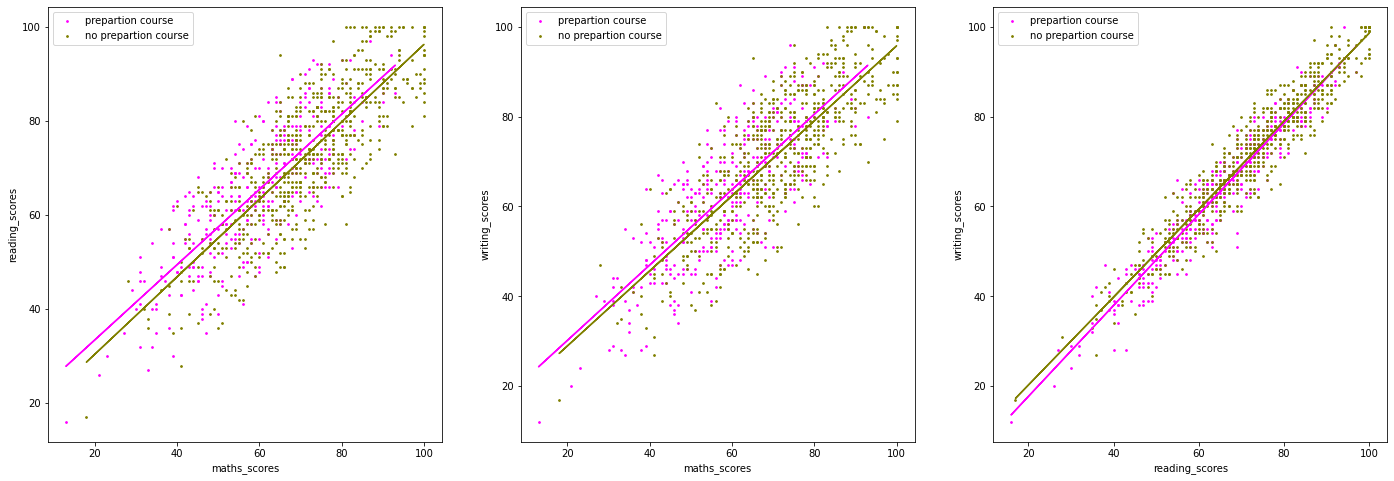

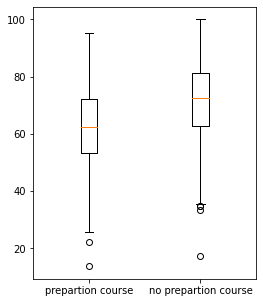

prepartion course 

 maths - reading corrolation: 0.7960204548944877 

maths - writing corrolation: 0.7875168633835087 

reading - writing corrolation: 0.9551470512026966


 no prepartion course 

maths - reading corrolation: 0.8073629027690701 

maths - writing corrolation: 0.7971296146979568 

reading - writing corrolation: 0.9534119437378282


(None, None)

In [112]:
########
########
df_prep = filter_by_remove("lunch","standard")[0]
df_noprep = filter_by_remove("lunch","free/reduced")[0]

print("The corrolations for preparation and for no preparation:")
corrolate(df_prep,df_noprep,"prepartion course","no prepartion course","magenta","olive")


The corrolations for free meals and for standard meals:


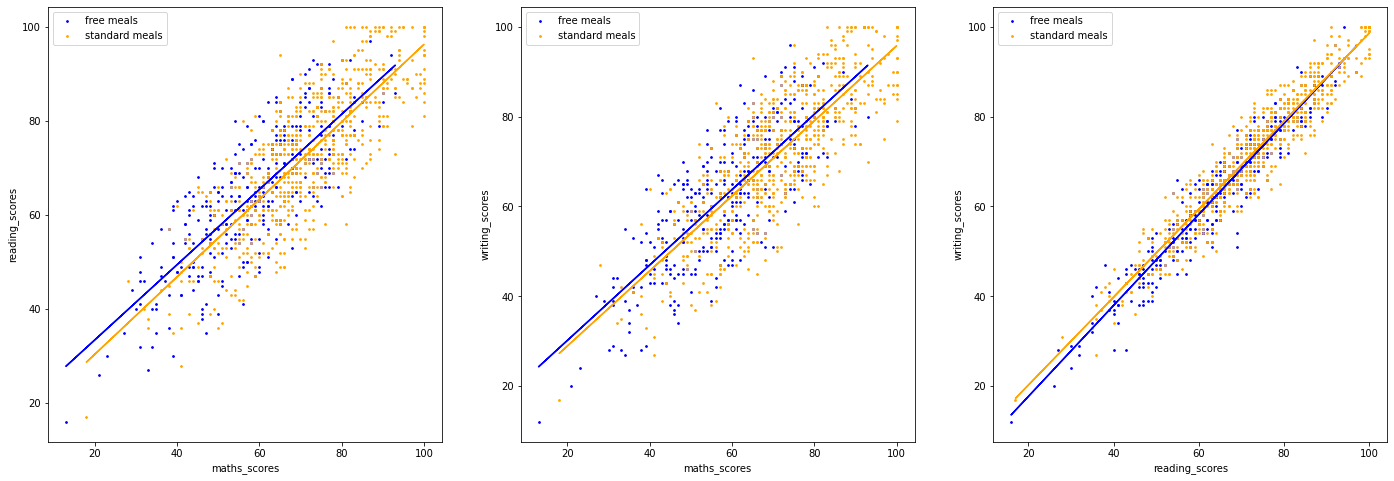

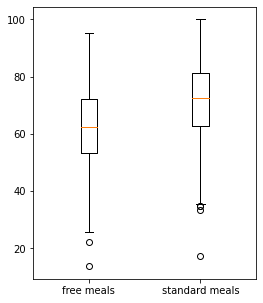

free meals 

 maths - reading corrolation: 0.7960204548944877 

maths - writing corrolation: 0.7875168633835087 

reading - writing corrolation: 0.9551470512026966


 standard meals 

maths - reading corrolation: 0.8073629027690701 

maths - writing corrolation: 0.7971296146979568 

reading - writing corrolation: 0.9534119437378282
subsidised
non subsidised


,lunch_free_%,lunch_standard_%
parental_education,,
associate's degree,18.98,19.0
bachelor's degree,11.33,11.0
high school,17.28,21.0
master's degree,7.93,7.0
some college,25.21,24.0
some high school,19.26,18.0


lunch         preparation_course
free/reduced  completed             125
              none                  228
standard      completed             237
              none                  410
Name: gender, dtype: int64 

 lunch         preparation_course
free/reduced  completed             67.040000
              none                  59.763158
standard      completed             76.081575
              none                  69.145528
Name: average_score, dtype: float64
<class 'pandas.core.series.Series'>


In [148]:
########
########
df_free_meals = filter_by_remove("lunch","standard")[0]
df_standard_meals = filter_by_remove("lunch","free/reduced")[0]

print("The corrolations for free meals and for standard meals:")
corrolate(df_free_meals,df_standard_meals,"free meals","standard meals","blue","orange")




print("subsidised")
#display(df_free_meals.groupby("parental_education").count()["lunch"])
print("non subsidised")
#df_pivot = pd.pivot_table(df,values=["Pop","Age"], index="State", aggfunc=np.mean)

sub_meals = pd.pivot_table(df_free_meals,values=["lunch"],index = "parental_education",aggfunc="count")
std_meals = pd.pivot_table(df_standard_meals,values=["lunch"],index = "parental_education",aggfunc="count")

df_combined_meals = pd.merge(sub_meals,std_meals, on="parental_education")
df_combined_meals.rename(columns = {"lunch_x" : "lunch_free_%","lunch_y": "lunch_standard_%"}, inplace = True)

arr_sub = df_combined_meals["lunch_free_%"]
arr_sub = round((100*arr_sub)/arr_sub.sum(),2)
arr_std = df_combined_meals["lunch_standard_%"]
arr_std = round((100*arr_std)/arr_std.sum())

df_combined_meals["lunch_free_%"] = arr_sub.tolist()
df_combined_meals["lunch_standard_%"] = arr_std.tolist()

display(df_combined_meals)

df_combined_meals_and_prep1 = df.groupby(["lunch","preparation_course"]).count()["gender"]
df_combined_meals_and_prep2 = df.groupby(["lunch","preparation_course"]).mean()["average_score"]
print(df_combined_meals_and_prep1,"\n\n",df_combined_meals_and_prep2)


#maths, reading, writing, avg,

As can be expected there is a clear and strong corrolation between the scores of each student. We can also see from this data that female students score on average 5% higher than their male counterparts and have an overal tighter and less varied dataset than the male students. Though the corrolation of female scores is slightly weaker than the male set, meaning that is a male student has scored highly in one test, he is more likley to score as highly is the other two than an equivilent female student.

Those who completed the preperation course had an increase of about 7% in their test scores. The average datasets for prepartion are very simmilar otherwise leading to the conclusion that the prepartion course lead to almost direct increase in a students test scores

There was only one student who did not prepare who score 100%, though only in one test, compared to several who did prepare and scored 100% on average. This is also true for having free school meals, only one student, on one test who recived free/subsidised school meals scored 100%.

Subsidised school meals are harder to interpret. While there is an increase of 9% in test score, there are many factors that can influence this statistic. Even when we look at the percentage of parents with higher education, when normalised, the data spread look very simmilar and does not explain the substantial increase in score.

To look further, we can see that the preperation course does not account for this differance either as the percentage of students who completed the course for both subsidised and standard meals are roughly equal at 35.41% to 36.63% respectivly. This is backed up by looking at the same set and seeing their average scores. This too has very simmilar structrure for the subsidised and standard meals and we can see 7.28% and 6.93% increase in average score respecitvly. Imporantly both respect the almost 10% score differnace between the subsidised and non-subsidised lunch groups. As a susidised student, by compoleteing the course, they are still below the average score of a non-susidised student who had not compoleted the preperation course

### Helpful references
---

Filtering on criteria using df references:  
`filtered_df = df[df['column name' == value]]`  

Filtering on multiple criteria using df reference:  
`filtered_df = df[df['first column name' == value] & df[second column name] >= value]`

Numpy help sheet:  http://datacamp-community-prod.s3.amazonaws.com/da466534-51fe-4c6d-b0cb-154f4782eb54

